In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,cohen_kappa_score, make_scorer,precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN 
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

#### loading the data, Each row in the data represents a zip code in USA.

In [14]:
data = pd.read_csv(r"C:\\Users\\ghreddy\\Downloads\\caravan-insurance-challenge\\caravan-insurance-challenge.csv")

#### The target variable has only 5 percent of positive cases, only 0.05 percent of the total zip codes have people who have bought the policies from CARAVAN company.

In [15]:
data[data["CARAVAN"]==1].iloc[:,0].count()/data.iloc[:,0].count()

0.059661983302789656

#### Origin column represents  whether the data point belongs to train or test datasets. Hence it can be dropped.

In [16]:
data=data.drop(columns='ORIGIN')

#### In the problem dataset itself, it is mentioned that the data is divided into train and test datasets using stratified sampling technique.

In [17]:
train =data.iloc[1:5822,:]
test = data.iloc[5823:,:]

#### Here is the list of variables present in the data.

In [11]:
x =['MOSTYPE','MAANTHUI',
 'MGEMOMV',
 'MGEMLEEF',
 'MOSHOOFD',
 'MGODRK',
 'MGODPR',
 'MGODOV',
 'MGODGE',
 'MRELGE',
 'MRELSA',
 'MRELOV',
 'MFALLEEN',
 'MFGEKIND',
 'MFWEKIND',
 'MOPLHOOG',
 'MOPLMIDD',
 'MOPLLAAG',
 'MBERHOOG',
 'MBERZELF',
 'MBERBOER',
 'MBERMIDD',
 'MBERARBG',
 'MBERARBO',
 'MSKA',
 'MSKB1',
 'MSKB2',
 'MSKC',
 'MSKD',
 'MHHUUR',
 'MHKOOP',
 'MAUT1',
 'MAUT2',
 'MAUT0',
 'MZFONDS',
 'MZPART',
 'MINKM30',
 'MINK3045',
 'MINK4575',
 'MINK7512',
 'MINK123M',
 'MINKGEM',
 'MKOOPKLA',
 'PWAPART',
 'PWABEDR',
 'PWALAND',
 'PPERSAUT',
 'PBESAUT',
 'PMOTSCO',
 'PVRAAUT',
 'PAANHANG',
 'PTRACTOR',
 'PWERKT',
 'PBROM',
 'PLEVEN',
 'PPERSONG',
 'PGEZONG',
 'PWAOREG',
 'PBRAND',
 'PZEILPL',
 'PPLEZIER',
 'PFIETS',
 'PINBOED',
 'PBYSTAND',
 'AWAPART',
 'AWABEDR',
 'AWALAND',
 'APERSAUT',
 'ABESAUT',
 'AMOTSCO',
 'AVRAAUT',
 'AAANHANG',
 'ATRACTOR',
 'AWERKT',
 'ABROM',
 'ALEVEN',
 'APERSONG',
 'AGEZONG',
 'AWAOREG',
 'ABRAND',
 'AZEILPL',
 'APLEZIER',
 'AFIETS',
 'AINBOED',
 'ABYSTAND']

#### The univariate analyis is performed on all the variables with the following function. The function generates boxplots and histograms for numerical variables and bar graphs for categorical data.

In [ ]:
def graph_5(data,col,directory):
   
    import pandas as pd    
    import matplotlib.pyplot as plt
    #data= pd.read_csv(data)
    cat = []
    #The below statements are used to obtain all the columns if the variable list is empty or 
    #the required columns mentioned in the list
    
    if len(col) == 0:
         k=data[list(data.columns)]
    else:
        
         k=data[list(data.columns[col])]
            
    #The below loop seperates categorical data from the numerical data in the dataset, the categorical data which are of numerical 
    #datatypes are also seperated
    
    for i in range(len(k.columns)):
        if k.dtypes[i] == 'object':
            cat.append(i)
        elif (len(k[k.columns[i]].unique())/len(k))*100 <= 50:
            cat.append(i)
    
        
    num =list(set(k)-set(k.columns[cat]))
    
    #In the below loop graphs are generated for the numerical variables obtained
    
    for i in range(0,len(k.columns)):
        
    #Histogram
    
        if k.columns[i] in num:
            var = k.columns[i]
            data.hist(k.columns[i],bins=10,figsize=(5,6),grid=False)
            plt.xlabel(var)
            plt.ylabel("Count",fontsize=14)
            plt.title("Histogram of "+var,fontsize=14)
            plt.savefig(directory+ var +"_histogram")
            plt.close()
    
    #Boxplots

            data.boxplot(k.columns[i],grid=False,figsize=(5,6))
            plt.ylabel("Count",fontsize=14)
            plt.title("Boxplot of "+var,fontsize=16)
            plt.savefig(directory+ var + "_boxplot")
            plt.close()
            
    #Bargraphs
    
        else:
            var =k.columns[i]
            data[var].value_counts().plot(kind = 'bar',figsize=(5,6),fontsize=12)
            plt.xlabel(var,fontsize=14)
            plt.ylabel("Count",fontsize=14)
            plt.title("Bar graph of "+var,fontsize=16)
            plt.savefig(directory+var + "_bargraph")
            plt.close()

#### The below function generates double bar plots for all the variables with respect to the target variable.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


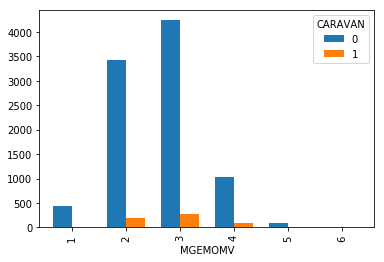

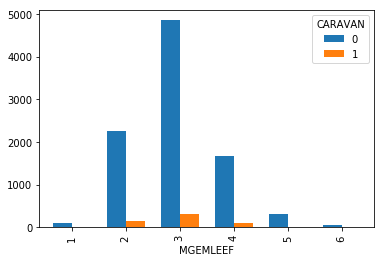

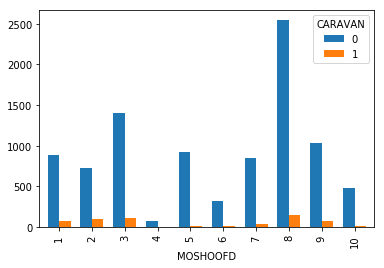

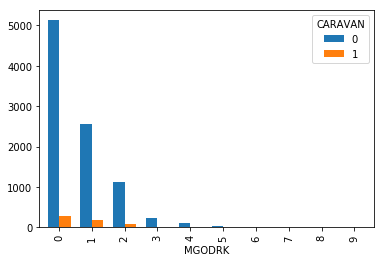

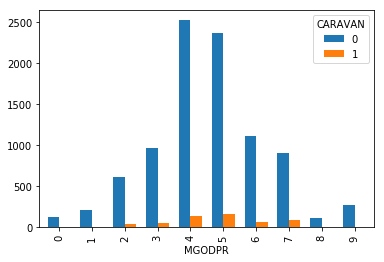

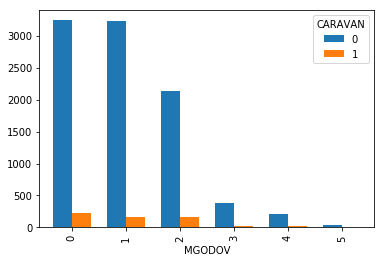

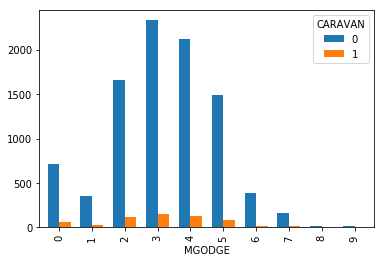

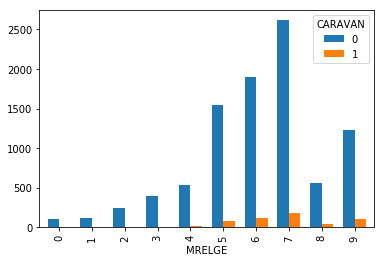

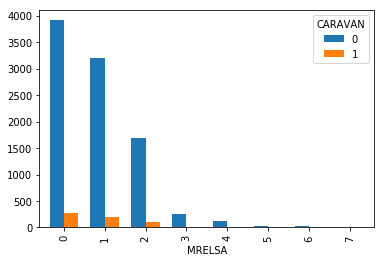

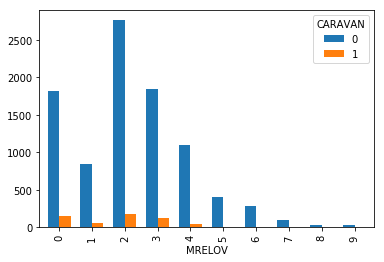

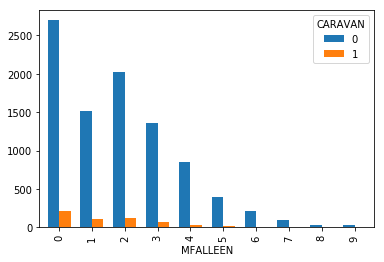

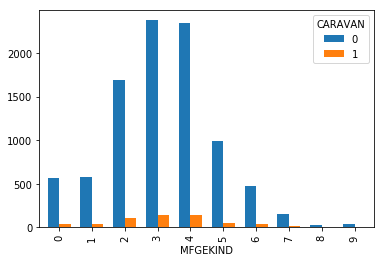

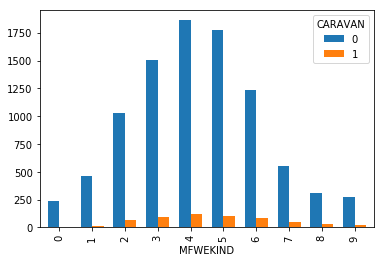

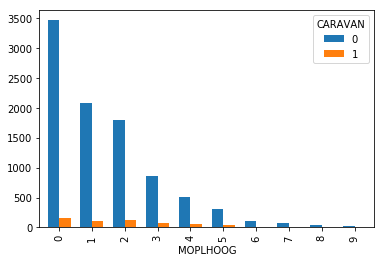

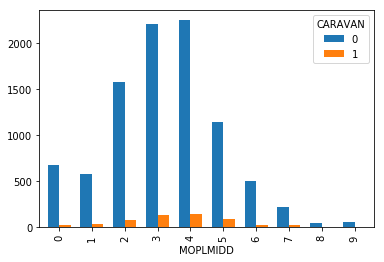

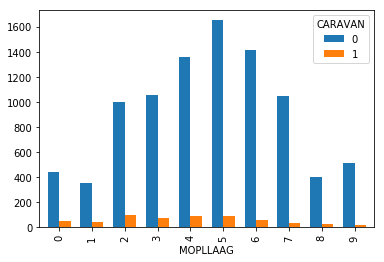

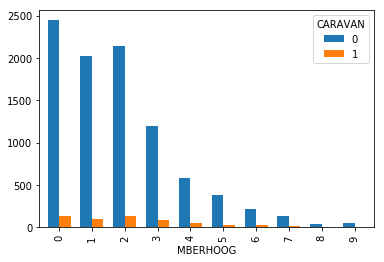

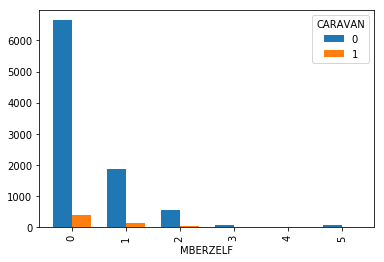

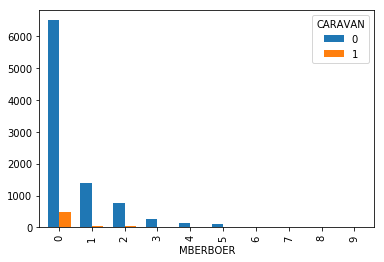

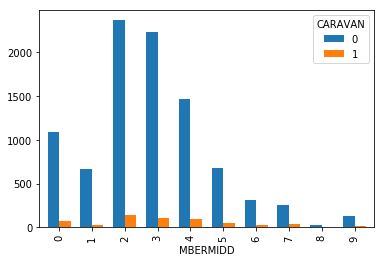

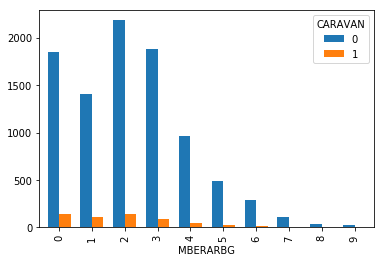

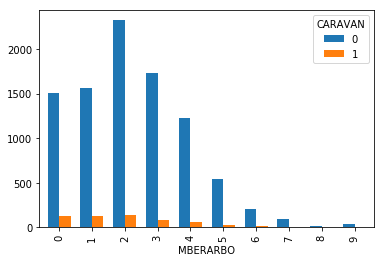

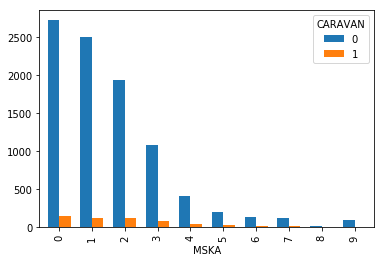

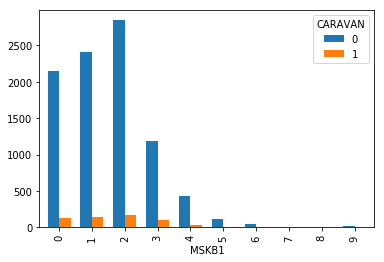

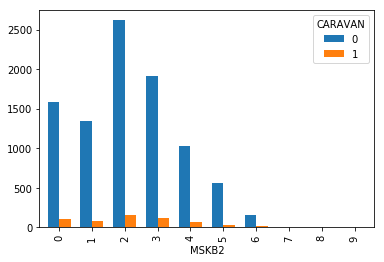

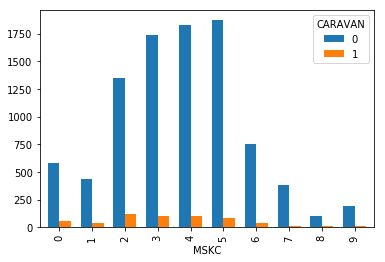

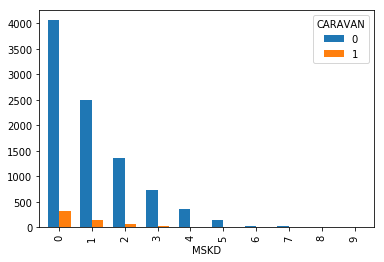

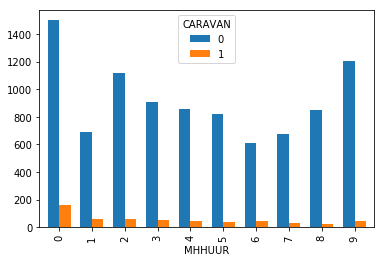

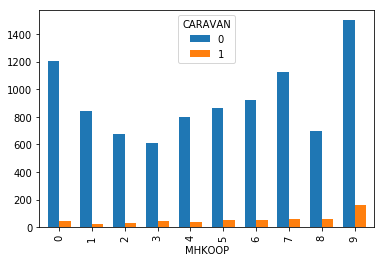

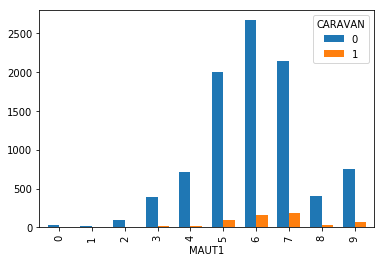

In [21]:
for i in range(2,32):
    pd.crosstab(data.iloc[:,i], data["CARAVAN"]).plot(kind='bar',width = 0.7)
    plt.savefig("output" + str(i))

#### For feature selection, Information values are used, the below function generates iv values for all the independent variables.

In [24]:
def calc_iv(df, feature, target, pr=0):

    lst = []

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[(df[feature] == val) & (df[target] == 0)].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])
    
    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'Good', 'Bad'])
    data = data[data['Bad'] > 0]

    data['Good Rate'] = data['Good'] / data['Good'].sum()
    data['Bad Rate'] = data['Bad'] / data['Bad'].sum()
    data['Distribution'] = (data['Good Rate'] - data['Bad Rate']) 
   
    data['WoE'] = np.log(data['Good Rate'] / data['Bad Rate'])
    data['IV'] = (data['WoE'] * (data['Distribution'])).sum()

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    if pr == 1:
        print(data)

    return (data['IV'].values[0],data['WoE'].values[0], feature)
    

In [25]:
z = []

for i in  range(0,len(x)):
    
     z.append(calc_iv(train, x[i],'CARAVAN'))

In [26]:
z
amaze=pd.DataFrame(z)

#### The values below gives us the iv values and WOE values for all the predictors.

In [27]:
z

[(0.3213751813950453, -0.580563790610713, 'MOSTYPE'),
 (0.0007346871620147902, 0.008570249469203746, 'MAANTHUI'),
 (0.03422872286296251, 0.7855796126678702, 'MGEMOMV'),
 (0.017849675793993137, 1.5350797297789474, 'MGEMLEEF'),
 (0.2612448541025786, -0.3944578423223861, 'MOSHOOFD'),
 (0.03036948447022352, 0.09374554806315177, 'MGODRK'),
 (0.06936235652429497, 1.58842571048424, 'MGODPR'),
 (0.03755662472722519, -0.08761745938093764, 'MGODOV'),
 (0.06577416141044545, -0.3260485816865629, 'MGODGE'),
 (0.12152575707158976, 0.6786074931157026, 'MRELGE'),
 (0.02641606980898759, -0.09636118734115812, 'MRELSA'),
 (0.10390314550369514, -0.2994184860769394, 'MRELOV'),
 (0.05947181733872561, -0.20747706320038756, 'MFALLEEN'),
 (0.0191623480438789, -0.03867144752411924, 'MFGEKIND'),
 (0.04043540780707397, 0.6323946499605709, 'MFWEKIND'),
 (0.12256159190535233, 0.3622784086887619, 'MOPLHOOG'),
 (0.054130701983523336, 0.6192781150580992, 'MOPLMIDD'),
 (0.16909317027548298, -0.524253582357543, 'MOPLLAA

In [28]:
feature_index =[]

for i in range(len(z)):
    if amaze.iloc[i,0]> 0.1 and amaze.iloc[i,0]< 0.5:
        print(i)
        feature_index.append(i)

0
4
9
11
15
17
24
28
29
30
31
33
36
38
41
42
43
58
64
67
79


In [29]:
new = data.iloc[:,feature_index]
new.columns

Index(['MOSTYPE', 'MOSHOOFD', 'MRELGE', 'MRELOV', 'MOPLHOOG', 'MOPLLAAG',
       'MSKA', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT0', 'MINKM30',
       'MINK4575', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PBRAND', 'AWAPART',
       'APERSAUT', 'ABRAND'],
      dtype='object')

####    After finding IV s for all the drivers, 21 most important features that contribute to the target varuable are being chosen.

In [30]:
newdata=data.iloc[:,feature_index]

In [31]:
newdata.shape

(9822, 21)

In [55]:
new_data = newdata

#### There is an imbalance in the data. Hence results will be more biased towards the majority data points. So the problem is solved using various oversampling and undersampling techniques, then all the models are applied on the new balanced data.

In [40]:
train_x,test_x,train_y,test_y = train_test_split(newdata,data["CARAVAN"],test_size = 0.3,random_state = 27)

In [41]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((6875, 21), (2947, 21), (6875,), (2947,))

### Applying SMOTE on the data

In [42]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(train_x, train_y.ravel())

In [43]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


After OverSampling, the shape of train_X: (12942, 21)
After OverSampling, the shape of train_y: (12942,) 



In [44]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 6471
After OverSampling, counts of label '0': 6471


# -------------------------Logistic Regression--------------------

In [46]:
logit = LogisticRegression()

In [47]:
logit.fit(X_train_res,y_train_res.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
cross_val_score(estimator = logit,X=X_train_res,y=y_train_res.ravel(),cv=3,n_jobs=-1)

array([0.78511822, 0.82916087, 0.83912842])

In [49]:
c = logit.predict(test_x)
len(c)

2947

In [50]:
f1_score(c,test_y), accuracy_score(c,test_y),cohen_kappa_score(c,test_y)

(0.14642857142857144, 0.837801153715643, 0.06879095250434986)

In [51]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(test_y,c)

array([[2428,  337],
       [ 141,   41]], dtype=int64)

In [63]:
print(classification_report(c,test_y))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2569
           1       0.23      0.11      0.15       378

   micro avg       0.84      0.84      0.84      2947
   macro avg       0.55      0.53      0.53      2947
weighted avg       0.79      0.84      0.81      2947



# ------------------------------Decision Tree----------------------------------

In [39]:
tree_model=DecisionTreeClassifier()

In [40]:
cross_val_score(estimator = tree_model,X=X_train_res,y = y_train_res.ravel(),cv=3,n_jobs=-1)

array([0.88479369, 0.93022717, 0.92489569])

In [41]:
tree_param_grid = {'max_depth':[2,3,4,5,6,7], 'criterion':['gini', 'entropy']}

In [42]:
best_tree = GridSearchCV(estimator = tree_model,
                        param_grid=tree_param_grid, n_jobs=-1,cv=3)

In [43]:
best_tree.fit(X=X_train_res, y=y_train_res.ravel())

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
cross_val_score(estimator = best_tree.best_estimator_,X=X_train_res,y=y_train_res.ravel(),cv=3,n_jobs=-1)

array([0.7364395, 0.7635605, 0.770051 ])

In [45]:
d = best_tree.predict(test_x)

In [46]:
f1_score(d,test_y), accuracy_score(d,test_y),cohen_kappa_score(d,test_y)

(0.1442392260334213, 0.669833729216152, 0.04518235874102894)

In [47]:
confusion_matrix(d, test_y)

array([[1892,  100],
       [ 873,   82]], dtype=int64)

In [62]:
print(classification_report(d,test_y))

              precision    recall  f1-score   support

           0       0.68      0.95      0.80      1992
           1       0.45      0.09      0.14       955

   micro avg       0.67      0.67      0.67      2947
   macro avg       0.57      0.52      0.47      2947
weighted avg       0.61      0.67      0.58      2947



# -------------------------Random Forest-----------------------------------

In [48]:
rf = RandomForestClassifier()

In [50]:
rf.fit(X_train_res,y_train_res.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
cross_val_score(estimator = rf,X=X_train_res,y=y_train_res.ravel(),cv=3,n_jobs=-1)

array([0.91562355, 0.95850719, 0.9527121 ])

In [52]:
rf_param = {'n_estimators' :[200,400,600],'max_features':[7,9]}

In [53]:
best_rf = GridSearchCV(estimator=rf, param_grid= rf_param, scoring = 'accuracy',cv=3,n_jobs=-1)

In [54]:
best_rf.fit(X_train_res,y_train_res.ravel())

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [200, 400, 600], 'max_features': [7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [55]:
cross_val_score(estimator = best_rf.best_estimator_ ,X=X_train_res,y=y_train_res.ravel(),cv=3,n_jobs=-1)

array([0.92373667, 0.96337506, 0.96685211])

In [56]:
e=best_rf.predict(test_x)

In [57]:
cohen_kappa_score(test_y,e),accuracy_score(test_y,e),f1_score(test_y,e)

(0.0851118038486901, 0.9015948422124194, 0.1369047619047619)

In [64]:
print(classification_report(e,test_y))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2793
           1       0.13      0.15      0.14       154

   micro avg       0.90      0.90      0.90      2947
   macro avg       0.54      0.55      0.54      2947
weighted avg       0.91      0.90      0.91      2947



In [58]:
confusion_matrix(test_y,e)

array([[2634,  131],
       [ 159,   23]], dtype=int64)

# -------------------------------SVM----------------------------------------

In [68]:
from sklearn.svm import SVC

In [69]:
clf=SVC(kernel='linear')

In [70]:
clf.fit(X_train_res,y_train_res.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [71]:
f=clf.predict(test_x)

In [72]:
cohen_kappa_score(test_y,f),accuracy_score(test_y,f),f1_score(test_y,f)

(0.037611778728500744, 0.8652867322701052, 0.10786516853932585)

In [73]:
confusion_matrix(test_y, f)

array([[2526,  239],
       [ 158,   24]], dtype=int64)

In [74]:
print(classification_report(test_y,f))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2765
           1       0.09      0.13      0.11       182

   micro avg       0.87      0.87      0.87      2947
   macro avg       0.52      0.52      0.52      2947
weighted avg       0.89      0.87      0.88      2947



### Applying SMOTE + Tomek links on the data

In [53]:
smt = SMOTETomek(random_state=42)

In [56]:
X_tomek, y_tomek = smt.fit_resample(new_data, data['CARAVAN'])

In [57]:
print('Original dataset shape %s' % Counter(data['CARAVAN']))

Original dataset shape Counter({0: 9236, 1: 586})


In [58]:
print('tomek dataset shape %s' % Counter(y_tomek))

tomek dataset shape Counter({0: 9171, 1: 9171})


In [59]:
train_xtomek,test_xtomek,train_ytomek,test_ytomek = train_test_split(X_tomek,y_tomek,test_size = 0.3,random_state = 27)

In [60]:
train_xtomek.shape, test_xtomek.shape, train_ytomek.shape, test_ytomek.shape

((12839, 21), (5503, 21), (12839,), (5503,))

### Logistic Regression for tomek over sampling

In [61]:
logit = LogisticRegression()

In [62]:
logit.fit(train_xtomek, train_ytomek)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
cross_val_score(estimator = logit,X=train_xtomek,y=train_ytomek,cv=3,n_jobs=-1)

array([0.80537383, 0.79649533, 0.80182286])

In [64]:
c = logit.predict(test_xtomek)
len(c)

5503

In [65]:
f1_score(c,test_ytomek), accuracy_score(c,test_ytomek),cohen_kappa_score(c,test_ytomek)

(0.7852246763137852, 0.7950208976921679, 0.590752623121976)

In [66]:
print(classification_report(c,test_ytomek))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      3047
           1       0.74      0.84      0.79      2456

   micro avg       0.80      0.80      0.80      5503
   macro avg       0.80      0.80      0.79      5503
weighted avg       0.80      0.80      0.80      5503



In [67]:
confusion_matrix(test_ytomek,c)

array([[2313,  394],
       [ 734, 2062]], dtype=int64)

### Decision tree for tomek over sampling

In [68]:
tree_model=DecisionTreeClassifier()

In [69]:
cross_val_score(estimator = tree_model,X=train_xtomek,y=train_ytomek,cv=3,n_jobs=-1)

array([0.90116822, 0.90397196, 0.89553634])

In [70]:
tree_param_grid = {'max_depth':[2,3,4,5,6,7], 'criterion':['gini', 'entropy']}

In [71]:
best_tree = GridSearchCV(estimator = tree_model,
                        param_grid=tree_param_grid, n_jobs=-1,cv=3)

In [72]:
best_tree.fit(X=train_xtomek, y=train_ytomek)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
cross_val_score(estimator = best_tree.best_estimator_,X=train_xtomek,y=train_ytomek,cv=3,n_jobs=-1)

array([0.7432243 , 0.7635514 , 0.74246319])

In [75]:
d = best_tree.predict(test_xtomek)

In [76]:
f1_score(d,test_ytomek), accuracy_score(d,test_ytomek),cohen_kappa_score(d,test_ytomek)

(0.7820427236315086, 0.7626749045974923, 0.5241064329201591)

In [77]:
print(classification_report(d,test_ytomek))

              precision    recall  f1-score   support

           0       0.68      0.80      0.74      2307
           1       0.84      0.73      0.78      3196

   micro avg       0.76      0.76      0.76      5503
   macro avg       0.76      0.77      0.76      5503
weighted avg       0.77      0.76      0.76      5503



In [78]:
confusion_matrix(d, test_ytomek)

array([[1854,  453],
       [ 853, 2343]], dtype=int64)

### Random Forest for tomek over-sampling

In [79]:
rf = RandomForestClassifier()

In [80]:
rf.fit(train_xtomek, train_ytomek)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [81]:
cross_val_score(estimator = rf,X=train_xtomek,y=train_ytomek,cv=3,n_jobs=-1)

array([0.92640187, 0.9296729 , 0.92358028])

In [85]:
rf_param = {'n_estimators' :[200,400,600],'max_features':[7,9]}

In [86]:
best_rf = GridSearchCV(estimator=rf, param_grid= rf_param, scoring = 'accuracy',cv=3,n_jobs=-1)

In [87]:
best_rf.fit(train_xtomek, train_ytomek)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [200, 400, 600], 'max_features': [7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [88]:
cross_val_score(estimator = best_rf.best_estimator_ ,X=train_xtomek,y=train_ytomek,cv=3,n_jobs=-1)

array([0.94672897, 0.94415888, 0.93970554])

In [89]:
e=best_rf.predict(test_xtomek)

In [90]:
cohen_kappa_score(test_ytomek,e),accuracy_score(test_ytomek,e),f1_score(test_ytomek,e)

(0.8971086069612331, 0.9485735053607124, 0.9495633576902515)

In [91]:
confusion_matrix(test_ytomek,e)

array([[2556,  151],
       [ 132, 2664]], dtype=int64)

In [92]:
print(classification_report(e,test_ytomek))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2688
           1       0.95      0.95      0.95      2815

   micro avg       0.95      0.95      0.95      5503
   macro avg       0.95      0.95      0.95      5503
weighted avg       0.95      0.95      0.95      5503



### Support Vector Machine for tomek over-sampling

In [93]:
from sklearn.svm import SVC

In [94]:
clf=SVC(kernel='linear')

In [95]:
clf.fit(train_xtomek, train_ytomek)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [96]:
f=clf.predict(test_xtomek)

In [97]:
cohen_kappa_score(test_ytomek,f),accuracy_score(test_ytomek,f),f1_score(test_ytomek,f)

(0.6007993352959708, 0.7997455933127385, 0.7791583166332664)

In [98]:
confusion_matrix(test_ytomek, f)

array([[2457,  250],
       [ 852, 1944]], dtype=int64)

In [99]:
print(classification_report(f,test_ytomek))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      3309
           1       0.70      0.89      0.78      2194

   micro avg       0.80      0.80      0.80      5503
   macro avg       0.80      0.81      0.80      5503
weighted avg       0.82      0.80      0.80      5503



### Applying SMOTE +ENN on the data

In [100]:
smteen = SMOTEENN(random_state=42)

In [101]:
X_enn, y_enn = smteen.fit_resample(new_data, data['CARAVAN'])

### Logistic regression for enn over-sampling

In [102]:
train_xenn,test_xenn,train_yenn,test_yenn = train_test_split(X_enn,y_enn,test_size = 0.3,random_state = 27)

In [103]:
logit.fit(train_xenn, train_yenn)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [104]:
cross_val_score(estimator = logit,X=train_xenn,y=train_yenn,cv=3,n_jobs=-1)

array([0.81424658, 0.84191781, 0.82520548])

In [105]:
e1 = logit.predict(test_xenn)
len(e1)

4693

In [106]:
f1_score(e1,test_yenn), accuracy_score(e1,test_yenn),cohen_kappa_score(e1,test_yenn)

(0.8355718355718356, 0.8278286810142765, 0.6549780254515696)

In [107]:
confusion_matrix(test_yenn,e1)

array([[1832,  367],
       [ 441, 2053]], dtype=int64)

In [108]:
print(classification_report(test_yenn,e1))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      2199
           1       0.85      0.82      0.84      2494

   micro avg       0.83      0.83      0.83      4693
   macro avg       0.83      0.83      0.83      4693
weighted avg       0.83      0.83      0.83      4693



### Decision tree for enn over-sampling

In [109]:
cross_val_score(estimator = tree_model,X=train_xenn,y=train_yenn,cv=3,n_jobs=-1)

array([0.94082192, 0.93452055, 0.93068493])

In [110]:
best_tree.fit(X=train_xenn, y=train_yenn)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [111]:
cross_val_score(estimator = best_tree.best_estimator_,X=train_xenn,y=train_yenn,cv=3,n_jobs=-1)

array([0.76630137, 0.79780822, 0.77506849])

In [112]:
e2 = best_tree.predict(test_xenn)

In [113]:
f1_score(e2,test_yenn), accuracy_score(e2,test_yenn),cohen_kappa_score(e2,test_yenn)

(0.8157311669128509, 0.7873428510547624, 0.5680260150196194)

In [114]:
confusion_matrix(e2, test_yenn)

array([[1486,  285],
       [ 713, 2209]], dtype=int64)

In [115]:
print(classification_report(test_yenn,e2))

              precision    recall  f1-score   support

           0       0.84      0.68      0.75      2199
           1       0.76      0.89      0.82      2494

   micro avg       0.79      0.79      0.79      4693
   macro avg       0.80      0.78      0.78      4693
weighted avg       0.79      0.79      0.78      4693



### Random forest for enn over-sampling

In [116]:
rf.fit(train_xenn, train_yenn)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [117]:
cross_val_score(estimator = rf,X=train_xenn,y=train_yenn,cv=3,n_jobs=-1)

array([0.97342466, 0.97068493, 0.97178082])

In [118]:
best_rf.fit(train_xenn, train_yenn)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [200, 400, 600], 'max_features': [7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [119]:
cross_val_score(estimator = best_rf.best_estimator_ ,X=train_xenn,y=train_yenn,cv=3,n_jobs=-1)

array([0.97890411, 0.98      , 0.97534247])

In [120]:
e3=best_rf.predict(test_xenn)

In [121]:
cohen_kappa_score(test_yenn,e3),accuracy_score(test_yenn,e3),f1_score(test_yenn,e3)

(0.9773144146483456, 0.9887065842744513, 0.9894063561862882)

In [122]:
confusion_matrix(test_yenn,e3)

array([[2165,   34],
       [  19, 2475]], dtype=int64)

In [123]:
print(classification_report(test_yenn,e3))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2199
           1       0.99      0.99      0.99      2494

   micro avg       0.99      0.99      0.99      4693
   macro avg       0.99      0.99      0.99      4693
weighted avg       0.99      0.99      0.99      4693



### Support vector machine for enn over-sampling

In [124]:
clf.fit(train_xenn, train_yenn)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [125]:
e4=clf.predict(test_xenn)

In [126]:
cohen_kappa_score(test_yenn,e4),accuracy_score(test_yenn,e4),f1_score(test_yenn,e4)

(0.6621358452942993, 0.8310249307479224, 0.8358517905195612)

In [127]:
confusion_matrix(test_yenn, e4)

array([[1881,  318],
       [ 475, 2019]], dtype=int64)

In [128]:
print(classification_report(test_yenn,e4))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      2199
           1       0.86      0.81      0.84      2494

   micro avg       0.83      0.83      0.83      4693
   macro avg       0.83      0.83      0.83      4693
weighted avg       0.83      0.83      0.83      4693



### Applying random oversampling on the data

In [129]:
ros = RandomOverSampler(random_state=0)

In [130]:
X_over, y_over= ros.fit_resample(new_data, data['CARAVAN'])

### ----------  Random Over Sampling with logistic regression

In [131]:
train_xover,test_xover,train_yover,test_yover = train_test_split(X_over,y_over,test_size = 0.3,random_state = 27)

In [132]:
logit.fit(train_xover, train_yover)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [133]:
cross_val_score(estimator = logit,X=train_xover,y=train_yover,cv=3,n_jobs=-1)

array([0.68151241, 0.6712297 , 0.68345324])

In [134]:
o1 = logit.predict(test_xover)
len(o1)

5542

In [135]:
f1_score(o1,test_yover), accuracy_score(o1,test_yover),cohen_kappa_score(o1,test_yover)

(0.6740552325581396, 0.6762901479610249, 0.35281418983660917)

In [136]:
confusion_matrix(test_yover,o1)

array([[1893,  841],
       [ 953, 1855]], dtype=int64)

In [137]:
print(classification_report(test_yover,o1))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      2734
           1       0.69      0.66      0.67      2808

   micro avg       0.68      0.68      0.68      5542
   macro avg       0.68      0.68      0.68      5542
weighted avg       0.68      0.68      0.68      5542



### Decision tree for random over sampling

In [138]:
cross_val_score(estimator = tree_model,X=train_xover,y=train_yover,cv=3,n_jobs=-1)

array([0.92925075, 0.9350348 , 0.92991413])

In [139]:
best_tree.fit(X=train_xover, y=train_yover)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [140]:
cross_val_score(estimator = best_tree.best_estimator_,X=train_xover,y=train_yover,cv=3,n_jobs=-1)

array([0.74298307, 0.73433875, 0.7535391 ])

In [141]:
o2 = best_tree.predict(test_xover)

In [142]:
f1_score(o2,test_yover), accuracy_score(o2,test_yover),cohen_kappa_score(o2,test_yover)

(0.7623931623931625, 0.7491880187657886, 0.49772012830814816)

In [143]:
confusion_matrix(o2, test_yover)

array([[1922,  578],
       [ 812, 2230]], dtype=int64)

In [144]:
print(classification_report(test_yover,o2))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      2734
           1       0.73      0.79      0.76      2808

   micro avg       0.75      0.75      0.75      5542
   macro avg       0.75      0.75      0.75      5542
weighted avg       0.75      0.75      0.75      5542



### Random forest for random over sampling

In [145]:
rf.fit(train_xover, train_yover)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [146]:
cross_val_score(estimator = rf,X=train_xover,y=train_yover,cv=3,n_jobs=-1)

array([0.95175133, 0.95614849, 0.95242516])

In [147]:
best_rf.fit(train_xover, train_yover)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [200, 400, 600], 'max_features': [7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [148]:
cross_val_score(estimator = best_rf.best_estimator_ ,X=train_xover,y=train_yover,cv=3,n_jobs=-1)

array([0.94850383, 0.95986079, 0.95497795])

In [149]:
o3=best_rf.predict(test_xover)

In [150]:
cohen_kappa_score(test_yover,o3),accuracy_score(test_yover,o3),f1_score(test_yover,o3)

(0.9270180783921139, 0.9635510645976182, 0.9652801650051565)

In [151]:
confusion_matrix(test_yover,o3)

array([[2532,  202],
       [   0, 2808]], dtype=int64)

In [152]:
print(classification_report(test_yover,o3))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2734
           1       0.93      1.00      0.97      2808

   micro avg       0.96      0.96      0.96      5542
   macro avg       0.97      0.96      0.96      5542
weighted avg       0.97      0.96      0.96      5542



### Support vector machine for random over sampling

In [153]:
clf.fit(train_xover, train_yover)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [155]:
o4=clf.predict(test_xover)

In [156]:
cohen_kappa_score(test_yover,o4),accuracy_score(test_yover,o4),f1_score(test_yover,o4)

(0.3657828661238377, 0.6827859978347167, 0.6809437386569873)

In [157]:
confusion_matrix(test_yover, o4)

array([[1908,  826],
       [ 932, 1876]], dtype=int64)

In [158]:
print(classification_report(test_yover,o4))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      2734
           1       0.69      0.67      0.68      2808

   micro avg       0.68      0.68      0.68      5542
   macro avg       0.68      0.68      0.68      5542
weighted avg       0.68      0.68      0.68      5542

